## Проект по очистке данных
### Import modules

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind, f_oneway

## Function block

In [2]:
'''Function to calculate IQR and 25, 75 quantile'''


def perc_iqr(col):
    perc25 = col.quantile(0.25)
    perc75 = col.quantile(0.75)
    iqr = perc75 - perc25
    print(
        'First quantile: {},'.format(perc25),
        'Third quantile: {},'.format(perc75),
        "IQR: {}, ".format(iqr),
        "Outliers: [{f}, {l}].".format(f=perc25 - 1.5*iqr, l=perc75 + 1.5*iqr))
    return (perc25 - 1.5*iqr, perc75 + 1.5*iqr, perc25, perc75)

In [3]:
'''Function for boxplot to score'''


def get_boxplot(col, df_1, df_2, df_3):
    fig, ax = plt.subplots(1, 3, figsize=(14, 2))
    sns.boxplot(x=col, y='score', data=df_1, ax=ax[0])
    ax[0].set_title('Boxplot for ' + col)
    ax[0].tick_params(axis='x', rotation=45)
    sns.boxplot(x=col, y='score', data=df_2, ax=ax[1])
    ax[1].set_title('Boxplot for ' + col)
    ax[1].tick_params(axis='x', rotation=45)
    sns.boxplot(x=col, y='score', data=df_3, ax=ax[2])
    ax[2].set_title('Boxplot for ' + col)
    ax[2].tick_params(axis='x', rotation=45)
    plt.show()

In [4]:
'''Check valid sample size function (good sample size not less then 20)'''


def check_sample(col, df):
    valid_list = []
    cols = df.dropna()[col].unique()
    for item in cols:
        if len(df[df[col] == item]['score']) >= 20:
            valid_list.append(item)
    return valid_list

In [5]:
'''TTest function'''


def get_stat_dif(col_list, df):
    for col in col_list:
        cols = check_sample(col, df)
        if len(cols) >= 2:
            combinations_all = list(combinations(cols, 2))
            for comb in combinations_all:
                if ttest_ind(df[df[col] == comb[0]]['score'], df[df[col] == comb[1]]['score']).pvalue <= 0.05/len(combinations_all):
                    print(
                        'Найдены статистически значимые различия Ttest для колонки', col)
                    break
        else:
            print('Not enough samples for', col)

In [6]:
'''ANOVA test function'''


def get_stat_anova(col_list, df):
    for col in col_list:
        cols = check_sample(col, df)
        if len(cols) >= 2:
            var_list = []
            for item in cols:
                var_list.append(list(df[df[col] == item]['score']))
            if f_oneway(*var_list).pvalue <= 0.05:
                print('Найдены статистически значимые различия ANOVA для колонки', col)
        else:
            print('Not enough samples for', col)

### Basic Setup (reading csv, settings and initializing variables)

In [7]:
data = pd.read_csv('stud_math.csv')

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

sns.set()

display(data.head(10))
display(data.info())

cat_list = ['sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob',
            'reason', 'guardian', 'traveltime', 'studytime', 'failures',
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
            'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']

valid_dict_str = {'school': ['GP', 'MS'], 'sex': ['F', 'M'], 'address': ['U', 'R'], 'famsize': ['GT3', 'LE3'],
                  'pstatus': ['A', 'T'], 'mjob': ['teacher', 'health', 'services', 'at_home', 'other'],
                  'fjob': ['teacher', 'health', 'services', 'at_home', 'other'],
                  'reason': ['home', 'reputation', 'course', 'other'], 'guardian': ['mother', 'father', 'other'],
                  'schoolsup': ['yes', 'no'], 'famsup': ['yes', 'no'], 'paid': ['yes', 'no'], 'activities': ['yes', 'no'],
                  'nursery': ['yes', 'no'], 'higher': ['yes', 'no'], 'internet': ['yes', 'no'], 'romantic': ['yes', 'no']}

valid_dict_num = {'medu': [0.0, 4.0], 'fedu': [0.0, 4.0], 'traveltime': [1.0, 4.0],
                  'studytime': [1.0, 4.0], 'failures': [0.0, 4.0], 'famrel': [1.0, 5.0],
                  'freetime': [1.0, 5.0], 'goout': [1.0, 5.0], 'health': [1.0, 5.0]}

num_to_str_dict = {'medu': {0.0: 'no', 1.0: '1-4 grades', 2.0: '5-9 grades', 3.0: 'special or 11 grades', 4.0: 'high'},
                   'fedu': {0.0: 'no', 1.0: '1-4 grades', 2.0: '5-9 grades', 3.0: 'special or 11 grades', 4.0: 'high'},
                   'traveltime': {1.0: '< 15 min', 2.0: '15-30 min', 3.0: '5-10 houres', 4.0: '> 10 houres'},
                   'studytime': {1.0: '< 2 houres', 2.0: '2-5 houes', 3.0: '5-10 houres', 4.0: '> 10 houres'},
                   'famrel': {1.0: 'very few', 2.0: 'few', 3.0: 'several', 4.0: 'many', 5.0: 'too many'},
                   'health': {1.0: 'very few', 2.0: 'few', 3.0: 'several', 4.0: 'many', 5.0: 'too many'},
                   'freetime': {1.0: 'very bad', 2.0: 'bad', 3.0: 'average', 4.0: 'good', 5.0: 'veru good'},
                   'goout': {1.0: 'very bad', 2.0: 'bad', 3.0: 'average', 4.0: 'good', 5.0: 'veru good'}
                   }

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

### Basic treatment

In [8]:
# Deleting non-described column
data.drop(['studytime, granular'], inplace=True, axis=1)

In [9]:
# Lower columns names
data.columns = data.columns.str.lower()

### score column

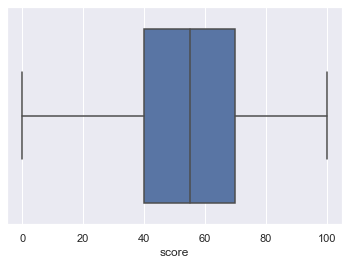

In [10]:
# Clearing Score column
sns.boxplot(x=data['score'])
plt.show()
data.dropna(subset=['score'], inplace=True)
data = data[(data['score'] > 0) & (
    data['score'] <= 100)].reset_index(drop=True)

Я удалил строки с пустыми значениями, как строки по которым невозможно провести анализ.
Также я удалил строки со значениями равными нулю и больше 100, так как принял их за некорректный ввод. 
В дальнейшем, можно исследовать, каким способом получены эти данные и попробовать аналитически заменить их на валидные значения.

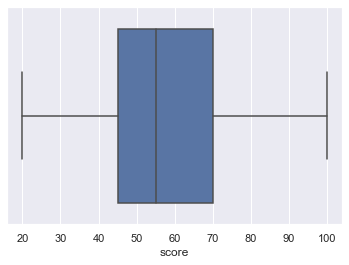

In [11]:
# Boxplot after treatment (clearing empty and 0 data)
sns.boxplot(x=data['score'])
plt.show()

### age column

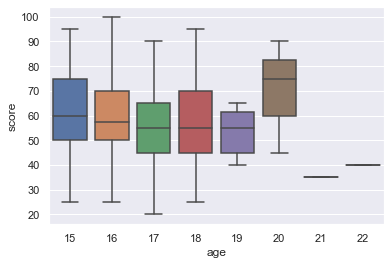

16    96
17    90
15    76
18    69
19    16
20     3
21     1
22     1
Name: age, dtype: int64

In [12]:
sns.boxplot(x='age', y='score', data=data)
plt.show()
display(data['age'].value_counts())

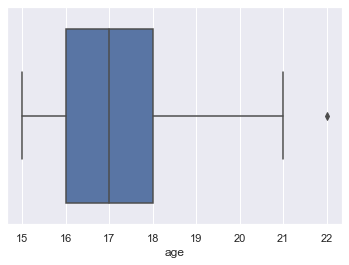

In [13]:
sns.boxplot(x=data['age'])
plt.show()

По барплоту видно, что 22 года - выброс. 21 год имеет только одно значение. Я принял решение удалить из датасета эти значения.

count    352.000000
mean      16.633523
std        1.256011
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

First quantile: 16.0, Third quantile: 18.0, IQR: 2.0,  Outliers: [13.0, 21.0].


16    96
17    90
15    76
18    69
19    16
20     3
Name: age, dtype: int64

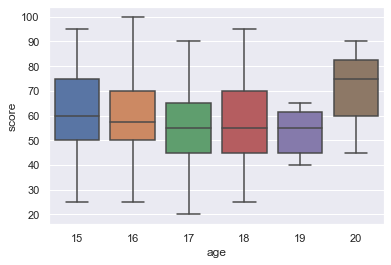

In [14]:
display(data['age'].describe())
age_iqr = perc_iqr(data['age'])

# According to boxplot and IQR delete outliers (desided delete 21 too)
data = data[(data['age'] > age_iqr[0]) & (data['age'] < age_iqr[1])]

display(data['age'].value_counts())

sns.boxplot(x='age', y='score', data=data)
plt.show()

### absences column treatment

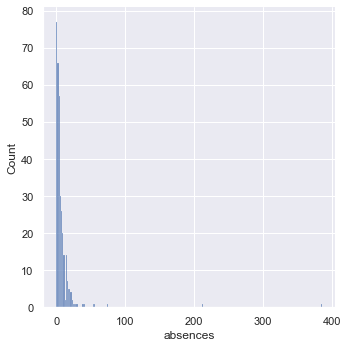

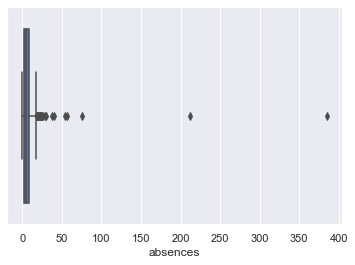

count    340.000000
mean       8.082353
std       24.772100
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 351
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  340 non-null    float64
dtypes: float64(1)
memory usage: 13.6 KB


None

First quantile: 2.0, Third quantile: 8.0, IQR: 6.0,  Outliers: [-7.0, 17.0].


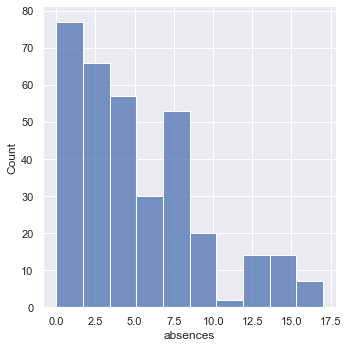

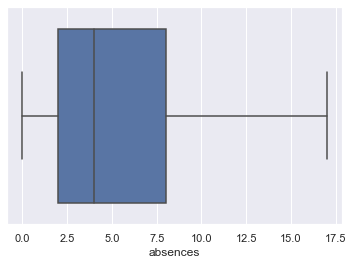

In [15]:
# Before
sns.displot(data['absences'])
plt.show()
sns.boxplot(x=data['absences'])
plt.show()

display(data['absences'].describe())
display(pd.DataFrame(data['absences']).info())
absences_iqr = perc_iqr(data['absences'])

# According to displot and IQR I desided to reduce high outliers to perc75
data['absences'] = data['absences'].apply(lambda x: None if pd.isna(x) else
                                          absences_iqr[3] if x > absences_iqr[1] else x)

# After
sns.displot(data['absences'])
plt.show()

# sns.boxplot(x='absences', y='score', data=data)
# plt.show
sns.boxplot(x=data['absences'])
plt.show()

Столбец с пропусками занятий имеет выбросы. Я решил их значения сократить до значения 3-ей квартили.

### Checking other columns data for valid values

In [16]:
for col in data.drop(['age', 'absences', 'score'], axis=1):
    if data[col].dtype != 'object' and col in valid_dict_num:
        data[col] = data[col].apply(lambda x: None if pd.isna(x)
                                    else abs(x) if (x < 0 and valid_dict_num[col][0] <= abs(x) <= valid_dict_num[col][1])
                                    else None if not valid_dict_num[col][0] <= x <= valid_dict_num[col][1]
                                    else x)
    else:
        data[col] = data[col].astype(str).apply(lambda x: None if x.strip() == '' else None if x not in valid_dict_str[col]
                                                else x)

# Plan
## Making 3 different DafaFrames:
### 1. Delete all rows with empty cells
### 2. Delete only rows with empty cells in 'score' columns (NaN and 0)
### 3. Filling NAN cells with mode or some another data
## Work with every DF
## Select the best

## DataFrame 1 (without empty cells - deleting all raws)

In [17]:
df1 = data.dropna()

## DataFrame 2 (With empty cell but Score columns)

In [18]:
df2 = data.copy()

In [19]:
temp = df2.copy()
for col in temp.drop(['age', 'absences', 'score'], axis=1):
    if temp[col].dtype == 'object' and len(valid_dict_str[col]) == 2:
        temp[col] = temp[col].apply(lambda x: 0 if x == valid_dict_str[col][0] else 1 if x == valid_dict_str[col][1] else None)
temp

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,0,0,18,0.0,NaN,0.0,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,NaN,1.0,4.0,3.0,4.0,3.0,6.0,30.0
1,0,0,17,0.0,0.0,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,3.0,3.0,3.0,4.0,30.0
2,0,0,15,0.0,1.0,1.0,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,0.0,1.0,NaN,1.0,0.0,0.0,0.0,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,0,0,15,0.0,0.0,1.0,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,2.0,5.0,2.0,75.0
4,0,0,16,0.0,0.0,1.0,3.0,3.0,other,other,home,father,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,18,0.0,1.0,1.0,3.0,1.0,teacher,services,course,mother,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,3.0,4.0,1.0,0.0,40.0
347,1,1,20,0.0,1.0,0.0,2.0,2.0,services,services,course,None,1.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,5.0,4.0,4.0,8.0,45.0
348,1,1,17,0.0,1.0,1.0,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,4.0,5.0,2.0,3.0,80.0
350,1,1,18,1.0,1.0,1.0,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,1.0,1.0,1.0,NaN,1.0,0.0,0.0,1.0,4.0,4.0,1.0,5.0,0.0,50.0


### DataFrame 3 (With empty cell filled by mode (or something else))

In [20]:
df3 = data.copy()
df3['medu'] = df3[['medu', 'fedu']].apply(lambda x: x[1] if pd.isna(x[0]) else x[0], axis=1)
df3['fedu'] = df3[['medu', 'fedu']].apply(lambda x: x[0] if pd.isna(x[1]) else x[1], axis=1)
for col in df3.drop(['age', 'absences', 'score'], axis=1):
    if df3[col].dtype == 'object':
        df3[col] = df3[col].apply(lambda x: df3[col].mode()[0] if pd.isna(x) else x)
    else:
        df3[col] = df3[col].apply(lambda x: int(df3[col].median()) if pd.isna(x) else x)
display(df3.head(30))

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,U,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,GT3,T,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


### Let's make correlation tables

In [21]:
display(df1.corr())

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.064244,0.001794,0.207520,-0.255374,0.235244,0.039952,-0.015702,0.034199,0.133780,0.071215,-0.113632
medu,-0.064244,1.000000,0.698501,-0.274843,0.010008,-0.151769,-0.021724,-0.029757,-0.027965,-0.101019,0.204627,0.048462
fedu,0.001794,0.698501,1.000000,-0.205104,-0.016882,-0.203539,-0.030284,-0.117021,-0.077100,0.063444,0.055270,0.040550
traveltime,0.207520,-0.274843,-0.205104,1.000000,-0.072168,-0.003083,-0.105300,-0.055504,-0.106815,0.145973,-0.127784,-0.150041
studytime,-0.255374,0.010008,-0.016882,-0.072168,1.000000,0.009999,0.040432,-0.235868,-0.093350,-0.137017,-0.009874,0.091870
failures,0.235244,-0.151769,-0.203539,-0.003083,0.009999,1.000000,-0.212966,-0.058133,-0.035254,0.098956,0.198587,-0.305270
famrel,0.039952,-0.021724,-0.030284,-0.105300,0.040432,-0.212966,1.000000,0.054694,0.040756,0.186324,-0.037157,-0.044452
freetime,-0.015702,-0.029757,-0.117021,-0.055504,-0.235868,-0.058133,0.054694,1.000000,0.374816,0.142735,0.248554,0.121383
goout,0.034199,-0.027965,-0.077100,-0.106815,-0.093350,-0.035254,0.040756,0.374816,1.000000,0.045185,0.083933,-0.111574
health,0.133780,-0.101019,0.063444,0.145973,-0.137017,0.098956,0.186324,0.142735,0.045185,1.000000,0.026919,-0.101459


In [22]:
display(df2.corr())

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.114011,-0.096873,0.115528,0.017599,0.154977,0.047210,-0.024112,0.108066,-0.031570,0.195437,-0.109475
medu,-0.114011,1.000000,0.611418,-0.169193,0.065638,-0.198983,-0.000707,0.029403,0.079968,-0.039489,0.083138,0.181841
fedu,-0.096873,0.611418,1.000000,-0.163935,-0.026872,-0.245652,-0.011019,-0.014419,0.056663,0.007528,0.000032,0.125465
traveltime,0.115528,-0.169193,-0.163935,1.000000,-0.106952,0.114852,-0.024536,-0.018266,0.032764,-0.004214,-0.049030,-0.080789
studytime,0.017599,0.065638,-0.026872,-0.106952,1.000000,-0.132196,0.066943,-0.120445,-0.023710,-0.094422,-0.065366,0.134241
failures,0.154977,-0.198983,-0.245652,0.114852,-0.132196,1.000000,-0.026545,0.101504,0.112011,0.098182,0.173402,-0.274286
famrel,0.047210,-0.000707,-0.011019,-0.024536,0.066943,-0.026545,1.000000,0.150913,0.039547,0.116129,-0.122546,0.050119
freetime,-0.024112,0.029403,-0.014419,-0.018266,-0.120445,0.101504,0.150913,1.000000,0.295895,0.079685,0.059507,-0.002888
goout,0.108066,0.079968,0.056663,0.032764,-0.023710,0.112011,0.039547,0.295895,1.000000,-0.000880,0.141277,-0.178604
health,-0.031570,-0.039489,0.007528,-0.004214,-0.094422,0.098182,0.116129,0.079685,-0.000880,1.000000,-0.022409,-0.083532


In [23]:
display(df3.corr())

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.111315,-0.098740,0.118043,0.017464,0.158074,0.045536,-0.027020,0.108006,-0.031054,0.195437,-0.109475
medu,-0.111315,1.000000,0.636892,-0.156626,0.064435,-0.195731,0.004312,0.028380,0.078418,-0.040098,0.084118,0.188258
fedu,-0.098740,0.636892,1.000000,-0.152737,-0.030639,-0.229038,-0.008663,0.002924,0.070030,0.009900,0.016569,0.117908
traveltime,0.118043,-0.156626,-0.152737,1.000000,-0.103051,0.103533,-0.026195,-0.014610,0.041944,-0.023009,-0.039649,-0.077107
studytime,0.017464,0.064435,-0.030639,-0.103051,1.000000,-0.124258,0.063821,-0.118344,-0.023730,-0.088950,-0.065112,0.131803
failures,0.158074,-0.195731,-0.229038,0.103533,-0.124258,1.000000,-0.034525,0.099374,0.108214,0.091441,0.172712,-0.272125
famrel,0.045536,0.004312,-0.008663,-0.026195,0.063821,-0.034525,1.000000,0.144865,0.038454,0.115691,-0.117544,0.048148
freetime,-0.027020,0.028380,0.002924,-0.014610,-0.118344,0.099374,0.144865,1.000000,0.293655,0.076461,0.055950,-0.005180
goout,0.108006,0.078418,0.070030,0.041944,-0.023730,0.108214,0.038454,0.293655,1.000000,0.001530,0.141208,-0.176262
health,-0.031054,-0.040098,0.009900,-0.023009,-0.088950,0.091441,0.115691,0.076461,0.001530,1.000000,-0.023605,-0.086966


### Сonclusions for correlations

Итак, корреляция по столбцам: age, absences к score:
По всем 3-м дата фреймам наблюдается слабая отрицательная корреляция. Что касается коррреляции между age и absences то она слабо положительная. Все числовые столбцы я возьму дальше для моделирования.

Также есть несколько псевдочисловых столбцов (они категориальные). Но по ним также можно посмотреть корреляцию. Видна сильная корреляция между medu и fedu - > 0.6 по всем вариантам датафреймов. По ним я сделал для третьего датафрейма заполнение пустых значений. Остальные корреляции от совсех слабых до слабых. Дальше будем смотреть по боксплотам и тестам.

### Boxplots for category columns

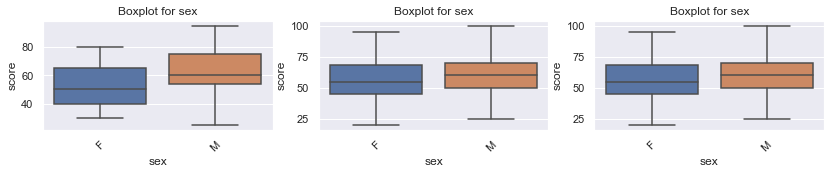

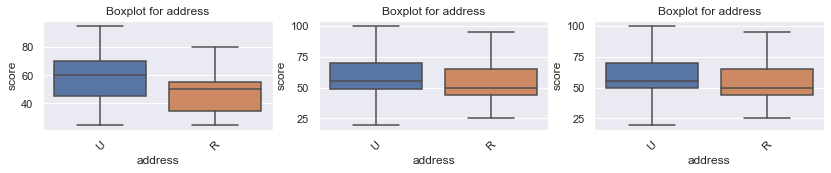

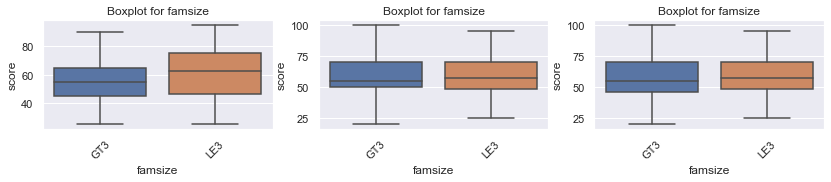

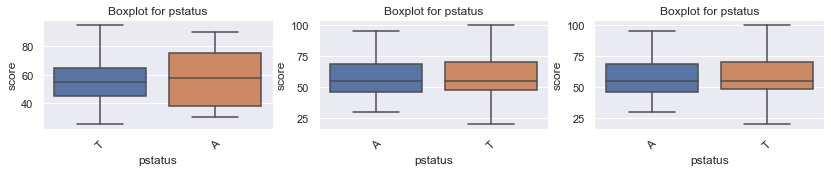

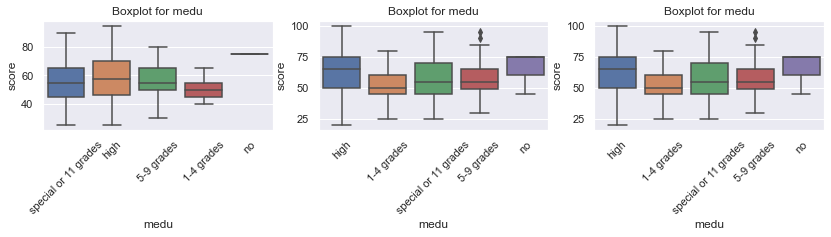

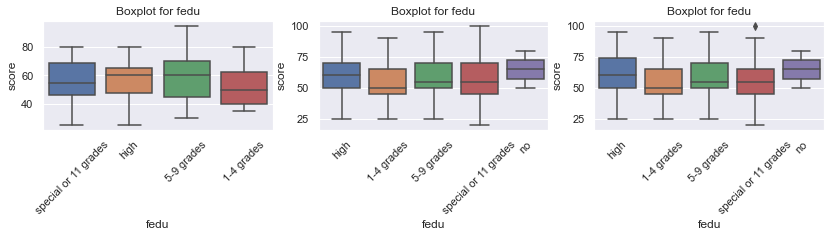

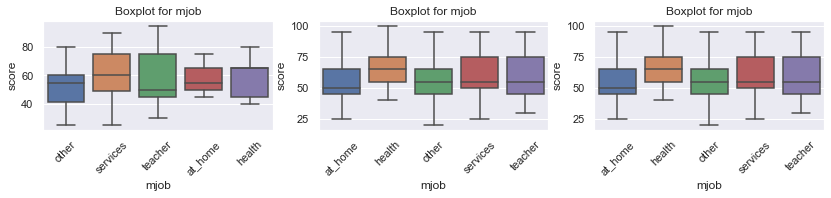

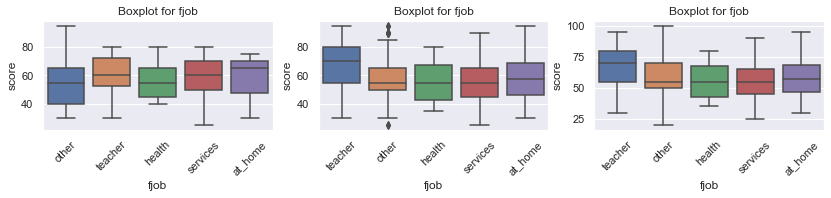

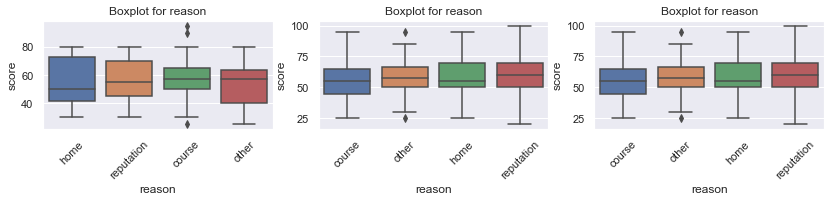

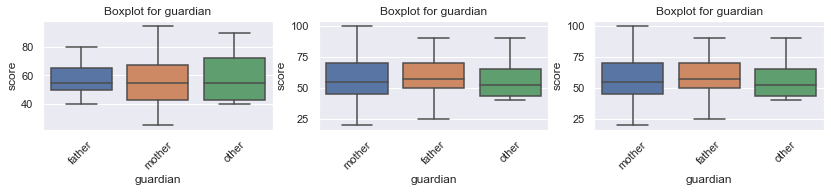

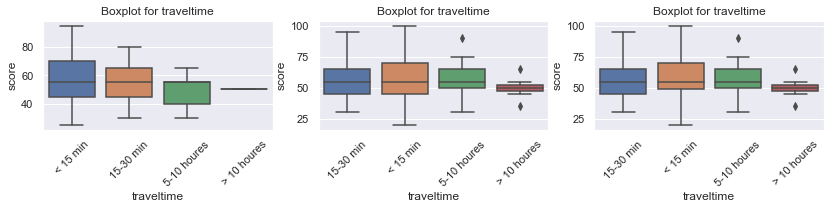

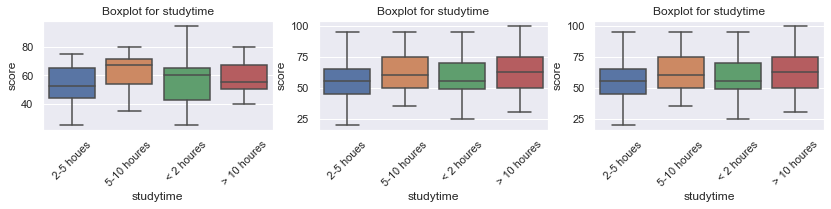

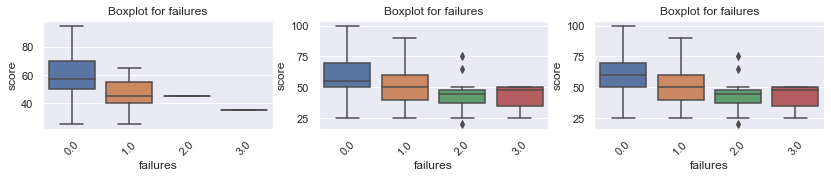

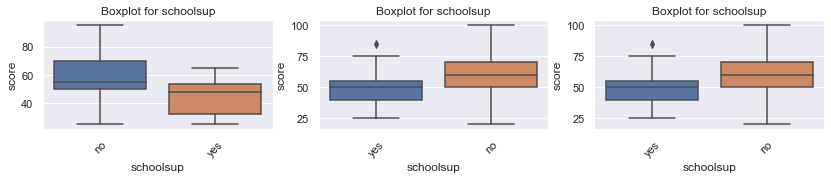

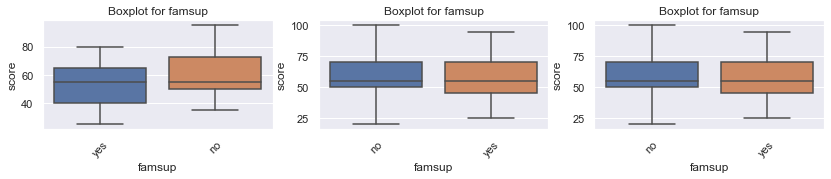

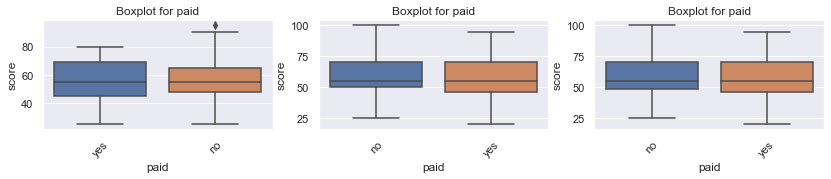

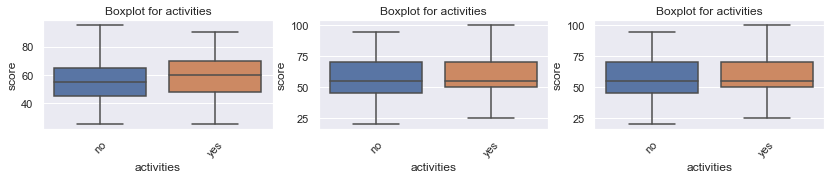

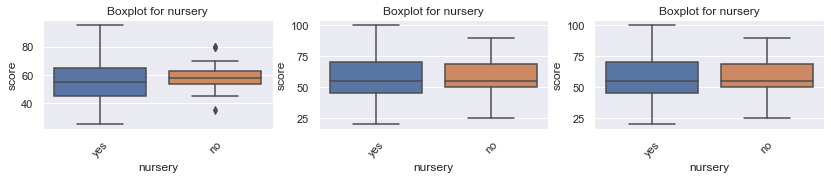

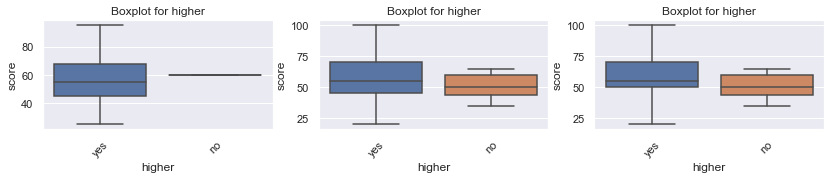

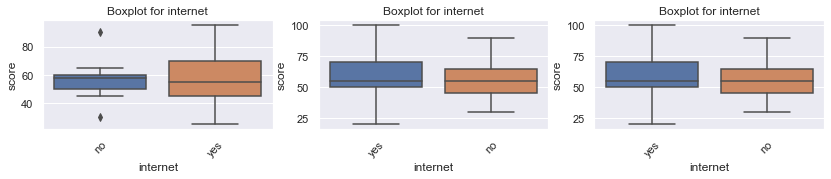

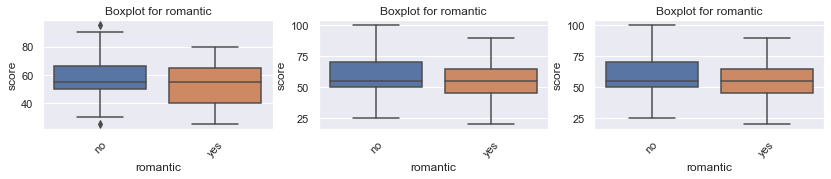

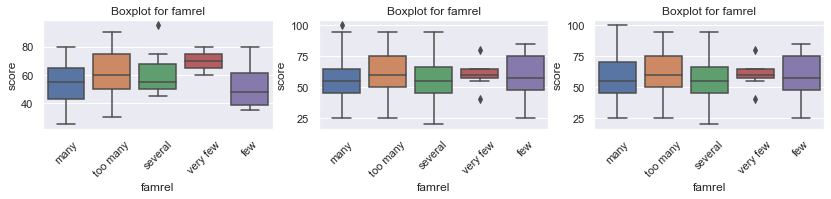

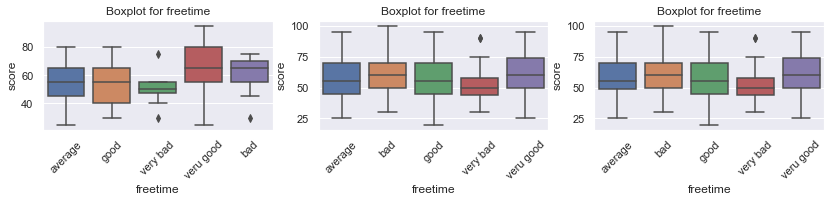

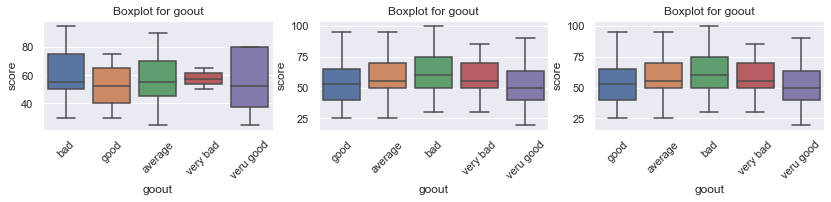

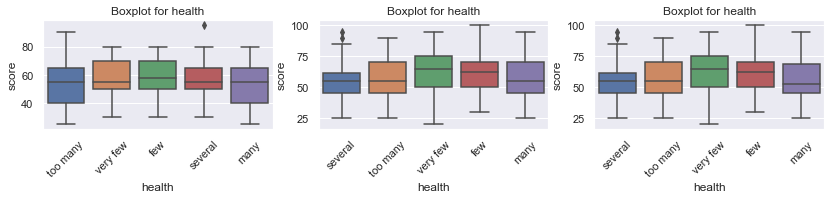

In [24]:
df1_tobox, df2_tobox, df3_tobox = df1.copy(), df2.copy(), df3.copy()
for col in num_to_str_dict:
    df1_tobox[col] = df1_tobox[col].apply(lambda y: None if pd.isna(y) else num_to_str_dict[col][y])
    df2_tobox[col] = df2_tobox[col].apply(lambda y: None if pd.isna(y) else num_to_str_dict[col][y])
    df3_tobox[col] = df3_tobox[col].apply(lambda y: None if pd.isna(y) else num_to_str_dict[col][y])
for col in cat_list:    
    get_boxplot(col, df1_tobox, df2_tobox, df3_tobox)

### Сonclusions for boxlpots

Из ряда боксплотов я бы выделил для дальнейшего моделирования следующие:
sex, famsize, medu, mjob, fjob, failures, schoolsup, goout, health.
Посмотрим на дальнейший статистический анализ

### Making Ttest and ANOVA test for all dataframe

In [25]:
get_stat_dif(cat_list, df1)

Найдены статистически значимые различия Ttest для колонки sex
Найдены статистически значимые различия Ttest для колонки address
Not enough samples for pstatus
Not enough samples for guardian
Not enough samples for failures
Not enough samples for schoolsup
Найдены статистически значимые различия Ttest для колонки famsup
Not enough samples for nursery
Not enough samples for higher
Not enough samples for internet
Not enough samples for health


In [26]:
get_stat_anova(cat_list, df1)

Найдены статистически значимые различия ANOVA для колонки sex
Найдены статистически значимые различия ANOVA для колонки address
Not enough samples for pstatus
Not enough samples for guardian
Not enough samples for failures
Not enough samples for schoolsup
Найдены статистически значимые различия ANOVA для колонки famsup
Not enough samples for nursery
Not enough samples for higher
Not enough samples for internet
Not enough samples for health


In [27]:
get_stat_dif(cat_list, df2)

Найдены статистически значимые различия Ttest для колонки sex
Найдены статистически значимые различия Ttest для колонки address
Найдены статистически значимые различия Ttest для колонки medu
Найдены статистически значимые различия Ttest для колонки fedu
Найдены статистически значимые различия Ttest для колонки mjob
Найдены статистически значимые различия Ttest для колонки fjob
Найдены статистически значимые различия Ttest для колонки studytime
Найдены статистически значимые различия Ttest для колонки failures
Найдены статистически значимые различия Ttest для колонки schoolsup
Not enough samples for higher
Найдены статистически значимые различия Ttest для колонки goout


In [28]:
get_stat_anova(cat_list, df2)

Найдены статистически значимые различия ANOVA для колонки sex
Найдены статистически значимые различия ANOVA для колонки address
Найдены статистически значимые различия ANOVA для колонки medu
Найдены статистически значимые различия ANOVA для колонки mjob
Найдены статистически значимые различия ANOVA для колонки fjob
Найдены статистически значимые различия ANOVA для колонки studytime
Найдены статистически значимые различия ANOVA для колонки failures
Найдены статистически значимые различия ANOVA для колонки schoolsup
Not enough samples for higher
Найдены статистически значимые различия ANOVA для колонки goout


In [29]:
get_stat_dif(cat_list, df3)

Найдены статистически значимые различия Ttest для колонки sex
Найдены статистически значимые различия Ttest для колонки address
Найдены статистически значимые различия Ttest для колонки medu
Найдены статистически значимые различия Ttest для колонки fedu
Найдены статистически значимые различия Ttest для колонки mjob
Найдены статистически значимые различия Ttest для колонки fjob
Найдены статистически значимые различия Ttest для колонки studytime
Найдены статистически значимые различия Ttest для колонки failures
Найдены статистически значимые различия Ttest для колонки schoolsup
Not enough samples for higher
Найдены статистически значимые различия Ttest для колонки goout


In [30]:
get_stat_anova(cat_list, df3)

Найдены статистически значимые различия ANOVA для колонки sex
Найдены статистически значимые различия ANOVA для колонки address
Найдены статистически значимые различия ANOVA для колонки medu
Найдены статистически значимые различия ANOVA для колонки fedu
Найдены статистически значимые различия ANOVA для колонки mjob
Найдены статистически значимые различия ANOVA для колонки fjob
Найдены статистически значимые различия ANOVA для колонки studytime
Найдены статистически значимые различия ANOVA для колонки failures
Найдены статистически значимые различия ANOVA для колонки schoolsup
Not enough samples for higher
Найдены статистически значимые различия ANOVA для колонки goout


### Сonclusions for statistic tests

Для первого датасета для дальнейшего моделирования есть 3 столбца.
Посмотрим, что для остальных двух:
Там данных больше и по ним есть более крупные выборки. И второй и третий датасеты дают похожий результат. Только одно отличие - ANOVA тест не дает отличий в fedu. В то время как Ttest этот столбец выдал в своем результате. В принципе, мои выводы по боксплотам совпали со статистическими тестами.
В конечный датасет для моделирования я возьму следующие столбцы:


In [34]:
model_df = df2[['sex', 'address']]